In [12]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

In [13]:
with open('../../data/pickle/20230111v1_30y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [14]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output
end_year = 2030

In [15]:
all_member = create_all_member(ws, end_year)

## Rateの分布

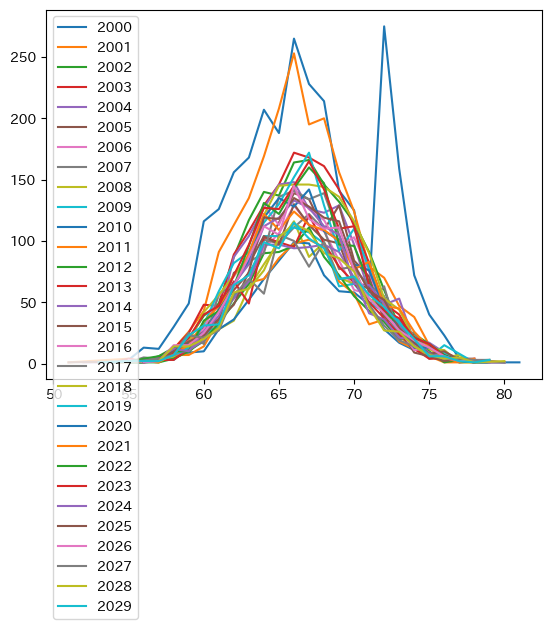

In [16]:
output = ws.players_result
for i in range(2000, end_year):
    output_ = output[((output["年度"]==i)&(output["年齢"]==18))]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

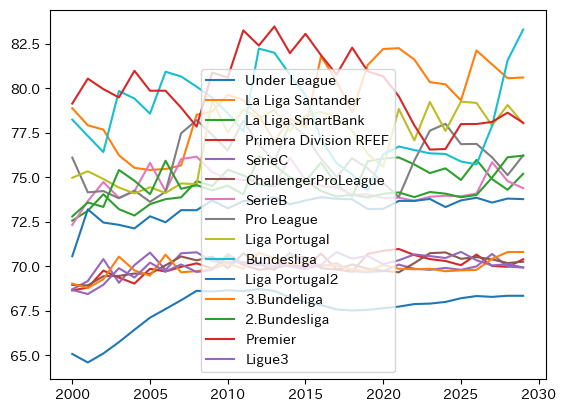

In [17]:
output = ws.players_result
league_list = output["リーグ"].unique()

x = np.arange(2000, end_year)

for name in league_list[:15]:
    y = []
    for year in range(2000, end_year):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year)&(output["出場時間"]>38*90*0.5))]
        y.append(output_["Rate"].mean())
    plt.plot(x, y, label=name)
plt.legend()
plt.show()

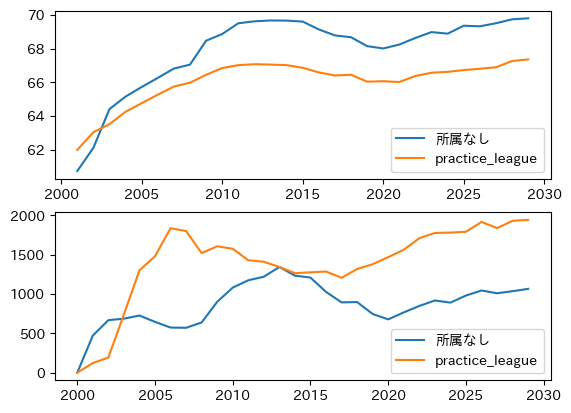

In [18]:
output = ws.players_result
league_list = ["所属なし", "practice_league"]

plt.subplot(2,1,1)
for name in league_list:
    y = []
    for year in range(2000, end_year):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year))]
        y.append(output_["Rate"].mean())
    plt.plot(x, y, label=name)
plt.legend()

plt.subplot(2,1,2)
for name in league_list:
    y = []
    for year in range(2000, end_year):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year))]
        y.append(len(output_))
    plt.plot(x, y, label=name)
plt.legend()
plt.show()

## ポジションごとのrate

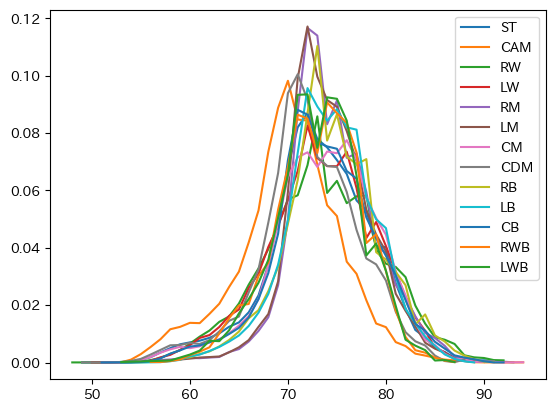

In [7]:
for pos in ALL_POSITON:
    output_ = output[output["ポジション"]==pos]
    if len(output_) < 100:
        continue
    b = output_["Rate"].value_counts().sort_index()
    x = output_["Rate"].unique()
    x.sort()
    plt.plot(x, b/len(output_), label=pos)
plt.legend()
plt.show()

In [9]:
output.groupby("ポジション")["Rate"].describe()

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,4253.0,68.932518,5.965084,53.0,65.0,68.0,73.0,87.0
CB,15651.0,71.501693,5.244128,54.0,68.0,71.0,75.0,93.0
CDM,5407.0,70.709821,5.183994,52.0,67.0,71.0,74.0,91.0
CM,12119.0,70.847677,5.197715,53.0,67.0,71.0,75.0,89.0
GK,11335.0,69.214733,5.304786,40.0,66.0,69.0,73.0,87.0
LB,5822.0,72.277053,4.418770,54.0,69.0,72.0,75.0,87.0
LM,4853.0,72.315475,4.364758,55.0,69.0,72.0,75.0,86.0
LW,4396.0,70.622611,4.891331,53.0,67.0,70.0,74.0,89.0
LWB,524.0,71.097328,4.161656,59.0,68.0,71.0,73.0,84.0


## 年代別

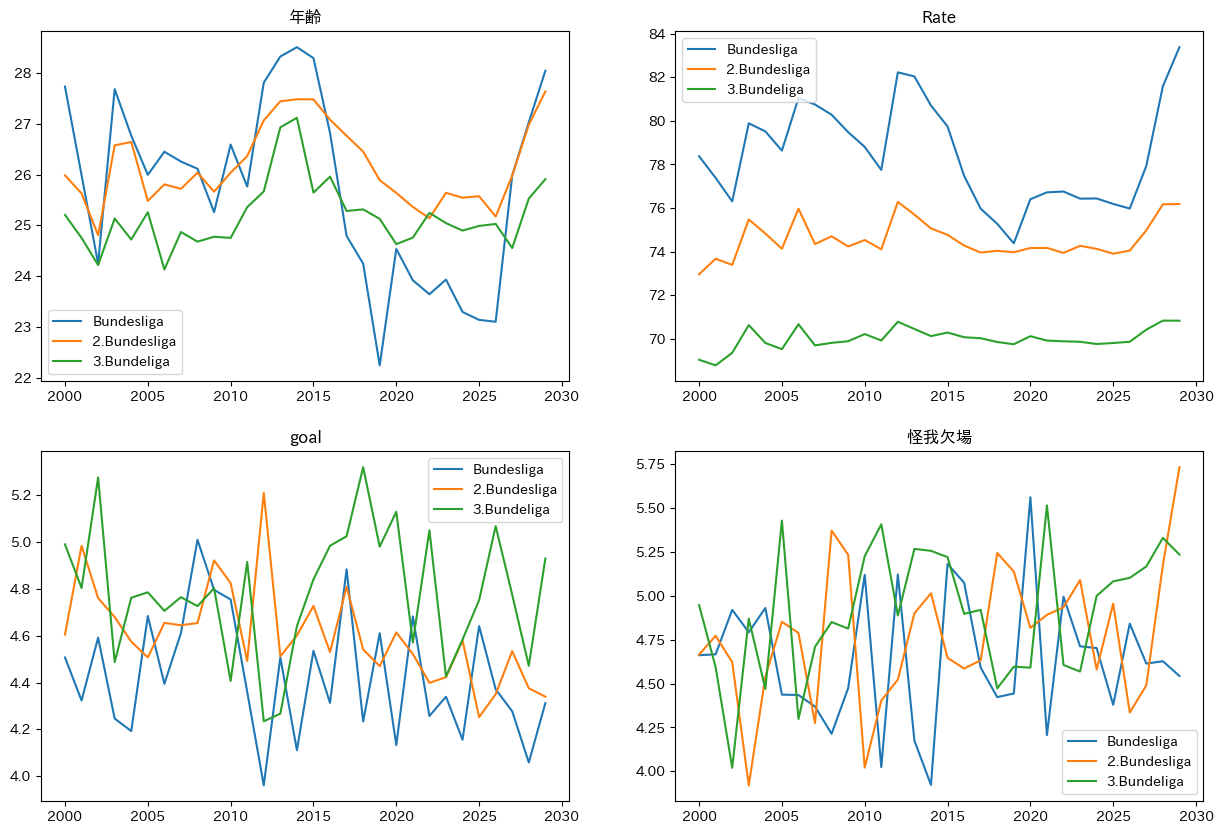

In [19]:
columns = ["年齢", "Rate", "goal", "怪我欠場"]
plt.figure(figsize=(15, 10))
for i, cl in enumerate(columns):
    plt.subplot(2, 2, i+1)
    country = ws.country_leagues[2]
    for league_num in range(3):
        output_ = output[output["リーグ"]==country.leagues[league_num].name]
        output_ = output_[output_["出場時間"]>2000]
        plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label=country.leagues[league_num].name)
    #output_ = output[output["リーグ"]=="rental_league"]
    #plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label="rental_league")
    plt.title(cl)
    plt.legend()

In [20]:
output = ws.players_result
output_ = output[output["Rate"]>83]
for year in range(2000, end_year):
    _output_ = output_[((output_["年度"]==year)&(output_["分類"]=="リーグ"))]
    display(_output_.groupby("Rate").count())

,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
85,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
86,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
87,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
88,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
85,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
86,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
87,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
88,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
85,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
86,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
87,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
88,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
85,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
86,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
87,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
88,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
89,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
85,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
86,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
87,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
88,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
89,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
90,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
85,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
86,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
87,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
88,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
89,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
85,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
86,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
87,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
88,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
89,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
85,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
86,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
87,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
88,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
89,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
90,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
85,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
86,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
87,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
88,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
89,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
85,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
86,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
87,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
88,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
89,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
92,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
85,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
86,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
87,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
88,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
89,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
92,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
85,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
86,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
87,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
88,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
89,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
90,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
91,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
92,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
85,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
86,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
87,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
88,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
89,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
90,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
91,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
92,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
85,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
86,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
87,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
88,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
89,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
92,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
85,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
86,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
87,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
88,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
89,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
90,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
85,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
86,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
87,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
88,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
89,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
90,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
85,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
86,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
87,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
88,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
89,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
85,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
86,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
87,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
88,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
89,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
85,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
86,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
87,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
88,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
89,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
85,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
86,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
87,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
88,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
89,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
85,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
86,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
87,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
88,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
90,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
94,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
85,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
86,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
87,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
88,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
85,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
86,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
87,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
88,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
89,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
94,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
85,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
86,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
87,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
88,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
89,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
90,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
91,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
85,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
86,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
87,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
88,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
89,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
85,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
86,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
87,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
88,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
89,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
85,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
86,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
87,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
88,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
89,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
90,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
91,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
85,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
86,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
87,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
88,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
89,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
90,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
91,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
85,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
86,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
87,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
88,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
89,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
90,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
85,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
86,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
87,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
88,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
89,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
90,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [11]:
for year in range(2000, end_year, 10):
    output_ = output[((output["年度"]>=year))]
    output_ = output_[output_["年度"]<year+10]
    display(output_.groupby("ポジション")["Rate"].describe())

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,11875.0,69.169600,5.518359,51.0,66.0,69.0,72.0,94.0
CB,37923.0,72.598555,5.630666,51.0,69.0,72.0,76.0,90.0
CDM,13298.0,71.120770,5.290679,49.0,68.0,71.0,75.0,88.0
CM,33871.0,72.147678,5.587068,51.0,69.0,72.0,76.0,90.0
GK,31719.0,70.687474,5.680739,43.0,68.0,71.0,74.0,88.0
LB,16368.0,73.359971,4.576893,53.0,71.0,73.0,76.0,88.0
LM,11691.0,73.343769,4.568061,53.0,70.0,73.0,76.0,88.0
LW,11264.0,72.079812,5.479213,50.0,69.0,72.0,76.0,89.0
LWB,1498.0,71.761682,4.313215,53.0,69.0,72.0,75.0,86.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,13206.0,71.014690,5.350758,53.0,68.0,71.0,75.0,88.0
CB,33371.0,74.766054,4.958167,53.0,72.0,75.0,78.0,91.0
CDM,13560.0,73.123378,5.149728,53.0,70.0,73.0,76.0,88.0
CM,32112.0,75.048860,5.162871,54.0,72.0,75.0,78.0,94.0
GK,30884.0,73.773475,5.255882,53.0,71.0,74.0,77.0,92.0
LB,18771.0,75.046987,4.579451,57.0,72.0,75.0,78.0,89.0
LM,11704.0,75.247266,4.055818,54.0,72.0,75.0,78.0,89.0
LW,11516.0,74.597256,5.479762,54.0,71.0,75.0,78.0,90.0
LWB,2211.0,73.986431,4.448071,58.0,71.0,74.0,77.0,85.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,13474.0,70.114962,4.844045,53.0,68.0,70.0,73.0,92.0
CB,33263.0,73.898867,4.639528,56.0,71.0,74.0,77.0,92.0
CDM,14160.0,72.284181,4.691172,53.0,70.0,72.0,75.0,87.0
CM,32329.0,74.061864,4.835350,54.0,71.0,74.0,77.0,90.0
GK,31312.0,72.645791,4.602588,52.0,71.0,73.0,75.0,90.0
LB,19127.0,74.528102,4.206270,56.0,72.0,75.0,77.0,87.0
LM,11833.0,74.184569,3.665148,54.0,72.0,74.0,76.0,89.0
LW,10988.0,73.327539,5.130571,53.0,70.0,73.0,77.0,89.0
LWB,2079.0,73.144781,4.267940,58.0,71.0,73.0,76.0,87.0


## 18歳のRate

In [34]:
output[output["年齢"]==18]["Rate"].value_counts().sort_index()

52       1
53       1
54      10
55      18
56      41
57      82
58     190
59     310
60     505
61     866
62    1277
63    1626
64    2072
65    2551
66    2808
67    2943
68    2813
69    2318
70    2085
71    1586
72    1303
73     925
74     590
75     408
76     184
77      93
78      33
79      18
80       6
81       2
82       4
86       2
Name: Rate, dtype: int64

## 怪我割合

In [13]:
print(output["怪我欠場"].sum()/13/20/(end_year-2000))
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

181.11602564102566
0     389690
1      27042
2      13851
3      13185
4      12109
5      11144
6      10012
7       9067
8       8394
9       7552
10      6923
11      6363
12      5557
13      5041
14      4411
15      3786
16      3593
17      3092
18      2704
19      2366
20      2065
21      1737
22      1540
23      1328
24      1174
25       980
26       868
27       704
28       621
29       481
30       444
32       377
31       363
33       219
34       200
35       150
36       128
37        95
38         9
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [14]:
output[output["Rate"]>95].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数
uuid,,,,,,,,,,,,,


In [44]:
ws.country_leagues[0].leagues[0].teams[2].rank_point_list

[11, 18, 33, 38, 54, 66, 79, 88, 92, 100, 108, 112, 119, 125, 127, 129, 132]

### チーム得点

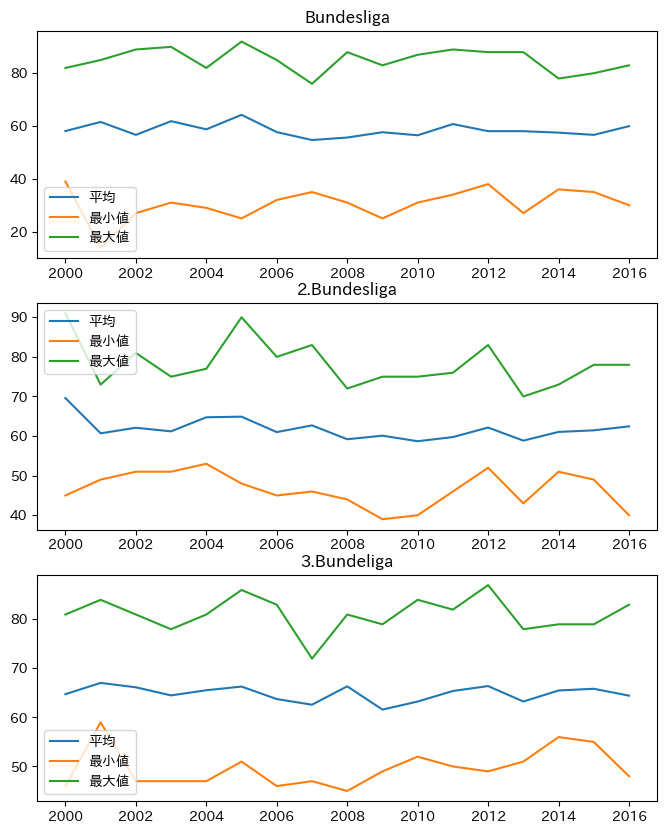

In [35]:
figure = plt.figure(figsize=(8, 10))
country = ws.country_leagues[2]
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = country.leagues[league_num].team_result[f"{country.leagues[league_num].name}_{year}"]
        me.append(output_["得点"].mean())
        mi.append(output_["得点"].min())
        ma.append(output_["得点"].max())
        st.append(output_["得点"].std())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{country.leagues[league_num].name}")
    plt.legend()
plt.show()

### 勝ち点

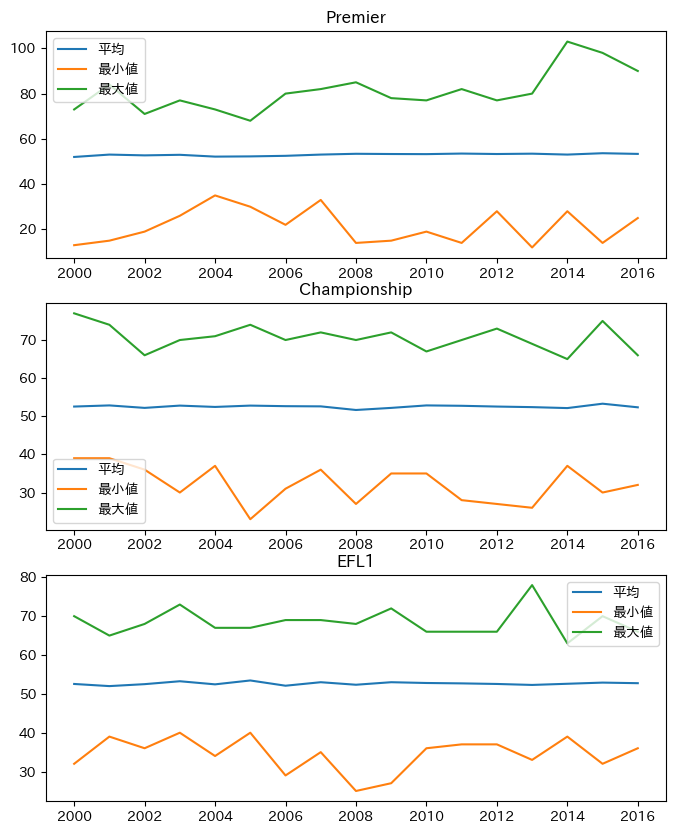

In [36]:
figure = plt.figure(figsize=(8, 10))
country = ws.country_leagues[0]
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = country.leagues[league_num].team_result[f"{country.leagues[league_num].name}_{year}"]
        me.append(output_["Points"].mean())
        mi.append(output_["Points"].min())
        ma.append(output_["Points"].max())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{country.leagues[league_num].name}")
    plt.legend()
plt.show()

## 引退年齢

In [37]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
24        2
25        3
26       52
27       88
28      133
29      184
30      246
31      350
32      455
33      575
34      850
35    11173
36       53
37       81
38      121
39      163
40      158
41      133
42      112
43      101
44       65
45       36
46       12
dtype: int64

## 成長タイプ

In [38]:
all_member["成長タイプ"].value_counts()

general    20359
grass       6915
genius      1724
legend       233
Name: 成長タイプ, dtype: int64

In [20]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,uuid,年齢,生まれ年,Rate,成長タイプ,リーグ,チーム,進退
13185,Vicent,da5223e2-64ba-11ed-a018-975f99737111,57,1973,44,legend,引退,引退,引退
15379,Keir,e7863148-64ba-11ed-a018-975f99737111,54,1976,66,legend,引退,引退,引退
13217,Jakel,e62fec76-64ba-11ed-a018-975f99737111,54,1976,56,legend,引退,引退,引退
16265,Buren,d9062178-64ba-11ed-a018-975f99737111,54,1976,63,legend,引退,引退,引退
15651,Olan,df3a2ed6-64ba-11ed-a018-975f99737111,53,1977,65,legend,引退,引退,引退
...,...,...,...,...,...,...,...,...,...
2438,Boone,98ac79f0-64ca-11ed-a018-975f99737111,18,2011,68,legend,La Liga Santander,Girona,現役
10127,Espn,98ebee32-64ca-11ed-a018-975f99737111,18,2011,66,legend,Liga Portugal,Penafiel,現役
900,Delshawn,98a0a076-64ca-11ed-a018-975f99737111,18,2011,63,legend,Championship,Middlesbrough,現役
1093,Vicent,98a1161e-64ca-11ed-a018-975f99737111,18,2011,63,legend,Championship,Cardiff,現役


In [21]:
buff = output[output["分類"]=="レンタルリーグ"]
buff[buff["Rate"]>80].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数


## レンタル選手

In [22]:
output[output["レンタル元"]!=""]["Rate"].value_counts().sort_index()

60        2
61        4
62       24
63      102
64      194
65      240
66      344
67      562
68     1100
69     2570
70     6282
71    12130
72    14492
73    14196
74    11254
75     2700
76     1506
77      658
78      226
79      154
80       46
81       12
82        4
83        2
Name: Rate, dtype: int64

In [23]:
output[output["レンタル元"]!=""]["年齢"].value_counts().sort_index()

19    15948
20    17042
21    14862
22    12134
23     2534
24      438
25      518
26      548
27      670
28      572
29      618
30      546
31      566
32      564
33      452
34      330
35      296
36      116
37       34
38       16
Name: 年齢, dtype: int64

In [24]:
p = search_player(England, all_member, uuid_)

NameError: name 'England' is not defined

In [ ]:
uuid_ = "04c218dc-4b00-11ed-a99e-00155d479737"
print_player(England, all_member, uuid_)

In [ ]:
p.shooting_initial

In [ ]:
output